# First try with $b_{b,nw}$

In [13]:
# imports
from importlib import reload

import seaborn as sns
from matplotlib import pyplot as plt

from oceancolor.hydrolight import loisel23
from oceancolor.utils import plotting

from xiop import geometric as xiop_geom
from xiop import inversion

In [2]:
%matplotlib ipympl

# Load up Loisel+2023

In [3]:
l23_ds = loisel23.load_ds(4,0)

## Unpack

In [4]:
l23_wave = l23_ds.Lambda.data
l23_Rrs = l23_ds.Rrs.data
l23_bbnw = l23_ds.bbnw.data

# Water

## Use Loisel+2023 (to be consistent)

In [5]:
aw = (l23_ds.a.data - l23_ds.anw.data)[0]
aw.shape

(81,)

In [6]:
bbw = (l23_ds.bb.data - l23_ds.bbnw.data)[0]

# Try one

In [7]:
idx = 170

In [8]:
Rrs = l23_Rrs[idx]
bbnw_true = l23_bbnw[idx]

## $r_{\rm rs}$

In [9]:
rrs = xiop_geom.rrs_from_Rrs(Rrs)

## Plot

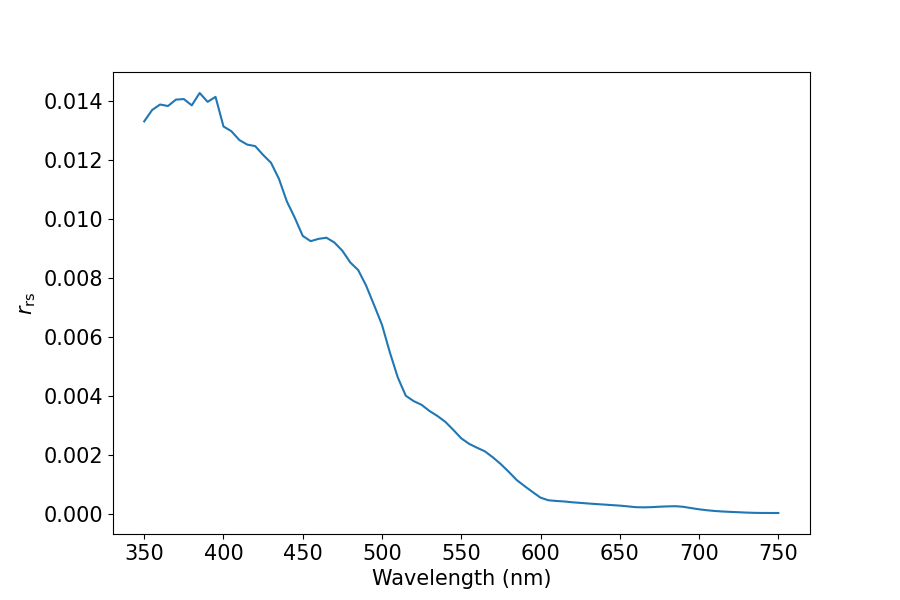

In [10]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, rrs)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$r_{\rm rs}$')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

## $D$

In [11]:
D = inversion.quadratic(l23_wave, rrs)

### Plot

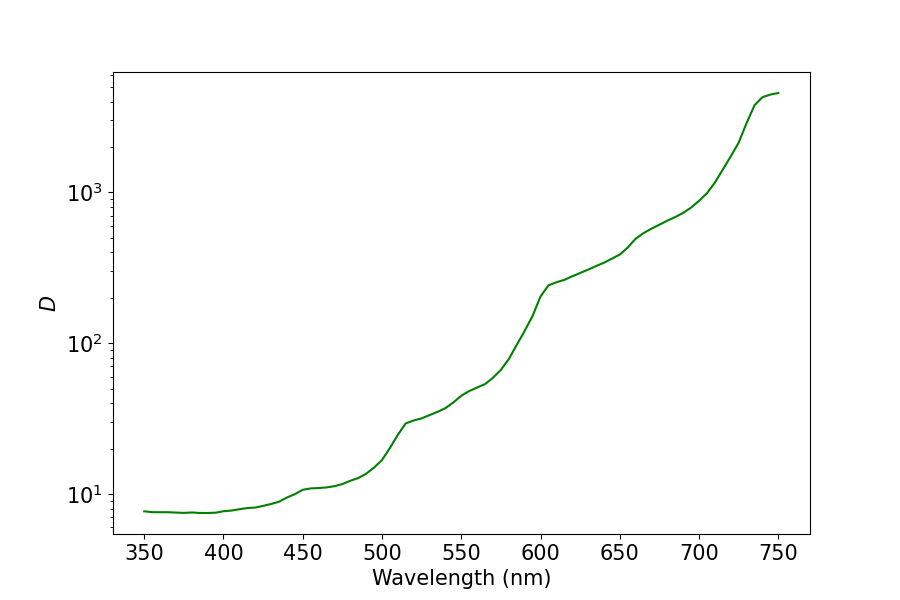

In [12]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, D, 'g')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$D$')
#
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

## Invert

In [14]:
reload(inversion)
bbnw = inversion.retrieve_bbnw(aw, bbw, D)

### Here we go...

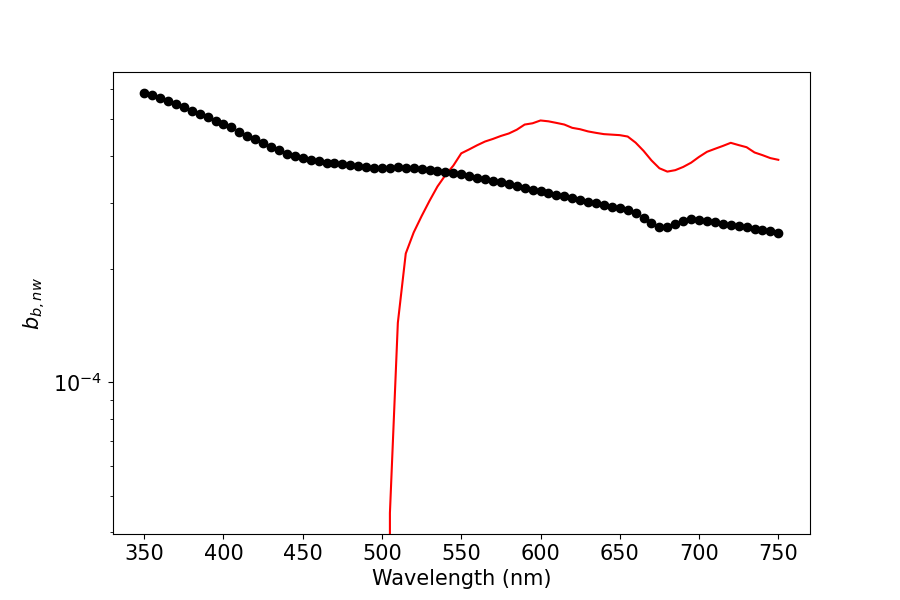

In [15]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, bbnw, 'r-', label='XIOP')
ax.plot(l23_wave, l23_bbnw[idx], 'ko', label='Truth')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$b_{b,nw}$')
#
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 15)
#
plt.show()